# <font color='blue'>Telecom Churn Case Study</font>
* Institution: IIIT, Bangalore and UpGrad
* Course: PG Diploma in Machine Lerning and AI March 2018
* Date: 13-Aug-2018
* Submitted by:
    1. Pandinath Siddineni (ID- APFE187000194)
    2. AKNR Chandra Sekhar (ID- APFE187000315)
    3. Brajesh Kumar       (ID- APFE187000149)
    4. Shweta Tiwari


### <font color='blue'>Business Goals:</font>
1. Retaining high profitable customers is the number one business goal.
2. This project is based on the Indian and Southeast Asian market.
3. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
4. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### <font color='blue'>Analysis Goals:</font>
1. Predict which customers are at high risk of churn
2. Build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
3. Prepaid is the most common model in India and southeast Asia. Focus on prepaid customers.
3. Curn definition used-- "Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time." In this project, we will use the usage-based definition to define churn.
4. In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.
5. especially high-value customers go through  three phases of customer lifecycle: a. The ‘good’ phase, b. The ‘action’ phase, c. The ‘churn’ phase
---------------------------

## <font color='blue'>PART 1: DATA UNDERSTANDING AND CLEANING</font>

1. Understand the properties of loaded dataframe
2. Idnetify Uniquness key
3. Identify bad colums that has no infromation (all entries are null or same)
4. Conver dates to meaningful number of days
5. Remove columns with data that does not make much sense for our analysis
6. Missing value treatment: replace with '0', mean or median; drop rows; drop columns
7. Outlier Treatment
8. Write data into a clean data file. This will be used to create master-df for analysis

### Import libraries and load datafile

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Until fuction: line seperator
def print_ln():
    print('-'*80, '\n')
    
pd.options.display.float_format = '{:.2f}'.format

# Load csv data file
telecom_orig = pd.read_csv('telecom_churn_data.csv', low_memory=False)

In [2]:
# Understand the properties of loaded dataframe
telecom = telecom_orig.copy()
print('Dataframe Shape: ', telecom.shape); print_ln();
print("Dataframe Info: \n"); telecom.info(); print_ln();
telecom.head(5)

Dataframe Shape:  (99999, 226)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
-------------------------------------------------------------------------------- 



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,...,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,...,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,...,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,...,0,nan,nan,nan,nan,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,...,0,0.00,nan,nan,nan,1526,0.00,0.00,0.00,0.00


### Treating Categorical Variables
There are 8 of them and all of these have more than 60% missing values.
Missing values can be imputed with '-1' where -1 can be treated as a new category.

CATEGORICAL VARIABLES:
* night_pck_user_6
* night_pck_user_7
* night_pck_user_8
* night_pck_user_9
* fb_user_6
* fb_user_7
* fb_user_8
* fb_user_9

In [3]:
# Missing values can be imputed with '-1' 
# where -1 can be treated as a new category.

categorical_vars = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
"night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

for var in categorical_vars:
    telecom[var].fillna(value=-1, inplace=True)

In [4]:
# Create dummy variables for all the six categorial variables
night_pck_user_6_s = pd.get_dummies(telecom['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_s = pd.get_dummies(telecom['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_s = pd.get_dummies(telecom['night_pck_user_8'],prefix="night8",drop_first=True)

fb_user_6_s = pd.get_dummies(telecom['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_s = pd.get_dummies(telecom['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_s = pd.get_dummies(telecom['fb_user_8'],prefix="fb8",drop_first=True)

telecom = pd.concat([telecom,night_pck_user_6_s],axis=1)
telecom = pd.concat([telecom,night_pck_user_7_s],axis=1)
telecom = pd.concat([telecom,night_pck_user_8_s],axis=1)

telecom = pd.concat([telecom,fb_user_6_s],axis=1)
telecom = pd.concat([telecom,fb_user_7_s],axis=1)
telecom = pd.concat([telecom,fb_user_8_s],axis=1)

### Missing Value Treatment
1. Delete: Delete the missing values 
2. Impute: 
    - Imputing by a simple statistic: Replace the missing values by another value, commonly the mean, median, mode etc. 
    - Predictive techniques: Use statistical models such as k-NN, SVM etc. to predict and impute missing values

#### COLUMN-WISE: MISSING VALUES

In [5]:
# summing up the missing values (column-wise)
telecom.isnull().sum()

mobile_number              0
circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
last_date_of_month_7     601
last_date_of_month_8    1100
last_date_of_month_9    1659
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
onnet_mou_6             3937
onnet_mou_7             3859
onnet_mou_8             5378
onnet_mou_9             7745
offnet_mou_6            3937
offnet_mou_7            3859
offnet_mou_8            5378
offnet_mou_9            7745
roam_ic_mou_6           3937
roam_ic_mou_7           3859
roam_ic_mou_8           5378
roam_ic_mou_9           7745
roam_og_mou_6           3937
roam_og_mou_7           3859
roam_og_mou_8           5378
roam_og_mou_9           7745
loc_og_t2t_mou_6        3937
                        ... 
sachet_2g_9                0
monthly_3g_6               0
monthly_3g_7               0
monthly_3g_8  

In [6]:
# Percentage of missing values (column-wise)
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
last_date_of_month_6   0.00
last_date_of_month_7   0.60
last_date_of_month_8   1.10
last_date_of_month_9   1.66
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
                       ... 
sachet_2g_9            0.00
monthly_3g_6           0.00
monthly_3g_7           0.00
monthly_3g_8           0.00
monthly_3g_9        

In [7]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
colmns_missing_data[colmns_missing_data >= 70]

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
total_rech_data_6          74.85
total_rech_data_7          74.43
total_rech_data_8          73.66
total_rech_data_9          74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
av_rech_amt_data_6         74.85
av_rech_amt_data_7         74.43
av_rech_amt_data_8         73.66
av_rech_amt_data_9         74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8 

In [8]:
# Treat missing values
# Columns used for filtering high-value customers, can't be dropped
# total_rech_data_6 
# total_rech_data_7 
# av_rech_amt_data_6 
# av_rech_amt_data_7 

# All these columns has more than 70% missing values

print(telecom.total_rech_data_6.describe()); print_ln()
print(telecom.total_rech_data_7.describe()); print_ln()
print(telecom.av_rech_amt_data_6.describe()); print_ln()
print(telecom.av_rech_amt_data_7.describe()); print_ln()

count   25153.00
mean        2.46
std         2.79
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        61.00
Name: total_rech_data_6, dtype: float64
-------------------------------------------------------------------------------- 

count   25571.00
mean        2.67
std         3.03
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        54.00
Name: total_rech_data_7, dtype: float64
-------------------------------------------------------------------------------- 

count   25153.00
mean      192.60
std       192.65
min         1.00
25%        82.00
50%       154.00
75%       252.00
max      7546.00
Name: av_rech_amt_data_6, dtype: float64
-------------------------------------------------------------------------------- 

count   25571.00
mean      200.98
std       196.79
min         0.50
25%        92.00
50%       154.00
75%       252.00
max      4365.00
Name: av_rech_amt_data_7, dtype: float64
---------------------------------------------

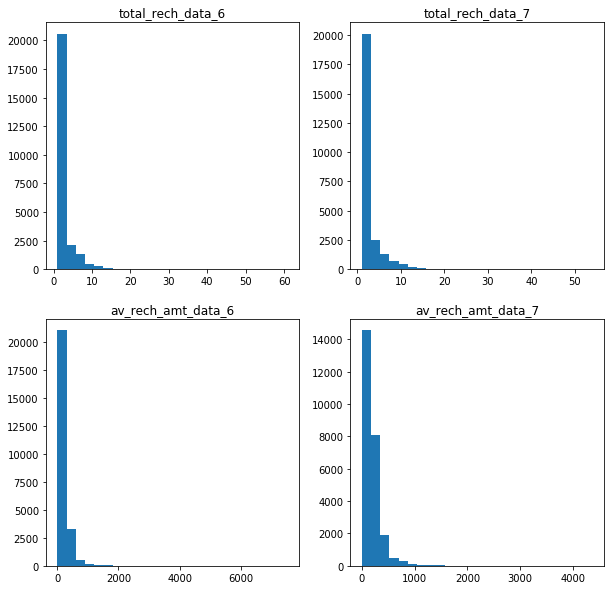

In [9]:
# Let us look at the distribution to find out the value to fill
# total_rech_data_6
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(telecom.total_rech_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(telecom.total_rech_data_7.dropna(),bins=25)

# av_rech_amt_data_6
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(telecom.av_rech_amt_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(telecom.av_rech_amt_data_7.dropna(),bins=25)

plt.show()

In [10]:
# Variables are numeric and distribution resemble the 'power law'. 
# The minimum value is 1, and not zero, 
# The rows with missing values also have the 'dates of recharge' columns 
# missing -- indicating that no recharge was done in this month. 
# Thus, missing values can be imputed with 0.

telecom.total_rech_data_6.fillna(value=0, inplace=True)
telecom.total_rech_data_7.fillna(value=0, inplace=True)
telecom.total_rech_data_8.fillna(value=0, inplace=True)
telecom.total_rech_data_9.fillna(value=0, inplace=True)

telecom.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_8.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [11]:
print(telecom["total_rech_data_6"].isnull().sum())

0


In [12]:
# Column analysis % of missing values
print(round(100*(telecom.isnull().sum()/len(telecom.index)), 2)); print_ln()

# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
print(colmns_missing_data[colmns_missing_data >= 70])

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
last_date_of_month_6   0.00
last_date_of_month_7   0.60
last_date_of_month_8   1.10
last_date_of_month_9   1.66
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
                       ... 
sachet_2g_9            0.00
monthly_3g_6           0.00
monthly_3g_7           0.00
monthly_3g_8           0.00
monthly_3g_9        

In [13]:
drop_missing_values_columns = colmns_missing_data[colmns_missing_data > 70].index
telecom.drop(drop_missing_values_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_missing_values_columns))
print('Dataframe Shape: ', telecom.shape)

Number of columns droped here  =  24
Dataframe Shape:  (99999, 214)


### Filter High-Value Customers

In [14]:
# New DERIVED Columns for Total Data Recharge Amount

telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"]*telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"]*telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"]*telecom['av_rech_amt_data_8']
telecom["total_rech_data_amt_9"] = telecom["total_rech_data_9"]*telecom['av_rech_amt_data_9']

# We can drop total_rech_data_* and av_rech_amt_data_*
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telecom.drop(drop_data_columns, axis=1, inplace=True)

In [15]:
# Filter high-value customers
avg_rech_amt_6_7 = (telecom["total_rech_amt_6"] + telecom["total_rech_data_amt_6"] + 
                      telecom["total_rech_amt_7"] + telecom["total_rech_data_amt_7"]) / 2.0
amont_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amont_70_pc)

telecom = telecom[avg_rech_amt_6_7 >= amont_70_pc]
print('Dataframe Shape: ', telecom.shape)

70 percentile of first two months avg recharge amount:  478.0
Dataframe Shape:  (30001, 210)


### Idnetify Curn & Tag Churners

In [16]:
# Identify Churn
X = telecom["total_ic_mou_9"] + telecom["total_og_mou_9"] + telecom["vol_2g_mb_9"] + telecom["vol_3g_mb_9"]
telecom["churn"] = np.where(X, 0, 1)
#telecom["churn"].head(10)

# Columns to be dropped: all columns ending with "_9"
drop_fourth_month_columns = [hdr for hdr in list(telecom) if hdr.endswith("_9")]
drop_fourth_month_columns += ["sep_vbc_3g"]
telecom.drop(drop_fourth_month_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_fourth_month_columns))
print('Dataframe Shape: ', telecom.shape); print_ln();

Number of columns droped here  =  48
Dataframe Shape:  (30001, 163)
-------------------------------------------------------------------------------- 



### Identify columns that have no varience & Drop

In [17]:
# Identify columns that have no varience
telecom_unique_count = telecom.nunique().sort_values(ascending=False)
#print("Dataframe Unique Values: \n", telecom_unique_count); print_ln()

# Identify bad colums that has no infromation (all entries are NA or same)
# Find columns with all NULL entries and add to drop_columns list
telecom_unique_count_is_zero = telecom_unique_count[telecom_unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", telecom_unique_count_is_zero); print_ln();
drop_no_varience_columns = list(telecom_unique_count_is_zero.index)

# Find columns with all same entries and add to drop_columns list
telecom_unique_count_is_one = telecom_unique_count[telecom_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", telecom_unique_count_is_one); print_ln();
drop_no_varience_columns += list(telecom_unique_count_is_one.index)

telecom.drop(drop_no_varience_columns, axis=1, inplace=True)

print('Dataframe Shape: ', telecom.shape); print_ln();
print('Number of columns dropped here  = ', len(drop_no_varience_columns))
print('Dataframe Shape: ', telecom.shape); print_ln();

Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)
-------------------------------------------------------------------------------- 

Dataframe Unique Value Count is ONE (all same values): 
 std_ic_t2o_mou_8        1
last_date_of_month_6    1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
std_og_t2c_mou_6        1
last_date_of_month_7    1
last_date_of_month_8    1
std_ic_t2o_mou_7        1
std_og_t2c_mou_7        1
std_ic_t2o_mou_6        1
std_og_t2c_mou_8        1
dtype: int64
-------------------------------------------------------------------------------- 

Dataframe Shape:  (30001, 150)
-------------------------------------------------------------------------------- 

Number of columns dropped here  =  13
Dataframe Shape:  (30001, 150)
-------------------------------------------------------------------------------- 



In [18]:
telecom.head(5) 

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
0,7000842753,197.38,214.82,213.80,nan,nan,0.00,nan,nan,0.00,...,0,1,0,1,0,1,252.00,252.00,252.00,1
7,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,0,0,0.00,0.00,0.00,1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,1,0,1,0.00,354.00,207.00,0
21,7002124215,514.45,597.75,637.76,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0,0,0,0.00,0.00,0.00,0
23,7000887461,74.35,193.90,366.97,48.96,50.66,33.58,85.41,89.36,205.89,...,0,0,0,1,0,1,0.00,712.00,540.00,0


#### ROW-WISE: MISSING VALUES

In [19]:
# sum it up to check how many rows have all missing values
print("Rows with all NULL values =",  telecom.isnull().all(axis=1).sum())

# sum of misisng values in each row
rows_missing_data = telecom.isnull().sum(axis=1)
rows_missing_data[rows_missing_data > 0]

Rows with all NULL values = 0


0        54
77       27
91        1
111      27
188      28
191       1
358      27
364      27
414      28
423      27
527      27
539      54
588       1
603       2
679       1
687      82
690      28
723      28
788      27
845      28
895      27
933      27
934      27
1138     54
1255     27
1374      1
1489     54
1500     55
1524     28
1555     56
         ..
98790    55
98823    28
98838     1
98872    28
98943    81
98962    27
98971     1
99000    27
99034    27
99070    27
99135    81
99142    81
99195    27
99224     2
99246    27
99296    27
99313     1
99323    27
99338    81
99391    27
99398    28
99436    28
99515     1
99611    27
99625    27
99672     1
99700    27
99790    55
99827    27
99851    56
Length: 1838, dtype: int64

In [20]:
# small percentage of rows has more than or equal to 27 missing values
drop_rows = telecom.isnull().sum(axis=1) >= 27
print("Number of rows with >= 27 missing values = {}".format(drop_rows.sum()))
print("     % of rows with >= 27 missing values = {} %".format(drop_rows.sum()/telecom.shape[0]*100))

# drop rows with missing values greater >= 27
telecom = telecom[telecom.isnull().sum(axis=1) < 27]
print('Dataframe Shape after dropping rows: ', telecom.shape); print_ln();

Number of rows with >= 27 missing values = 1497
     % of rows with >= 27 missing values = 4.989833672210926 %
Dataframe Shape after dropping rows:  (28504, 150)
-------------------------------------------------------------------------------- 



In [21]:
rows_missing_data = telecom.isnull().sum(axis=1)
#print(rows_missing_data)
print(rows_missing_data[rows_missing_data > 0])

91       1
191      1
588      1
603      2
679      1
1374     1
1913     1
2777     1
3757     1
4284     1
4814     1
4934     1
5187     1
5449     1
5798     1
5926     1
7304     1
7399     1
7567     1
7662     1
7914     1
8118     1
8159     1
8281     1
8454     1
8680     1
8979     1
9012     1
9027     1
9068     1
        ..
93165    1
93483    1
93755    1
93769    1
94057    1
94089    1
94241    1
94719    1
94970    1
95531    1
95638    1
95709    1
96053    1
96387    1
96403    1
96480    1
96522    1
96524    1
96715    2
97077    1
97158    1
97926    1
98753    1
98789    1
98838    1
98971    1
99224    2
99313    1
99515    1
99672    1
Length: 341, dtype: int64


In [22]:
# Missing Values Treatment: continue
# look at the COLUMN summary again
df = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
df[df > 0]

date_of_last_rech_6   0.12
date_of_last_rech_7   0.18
date_of_last_rech_8   0.97
dtype: float64

Note: The remaining missing values are in date columns, before imputing convert them into appropreate values for analysis.

### Fix Dates & convert to meaningful numbers
1. Convert date_of_last_rech_6 --> rech_b4_days_to_month_end_6 (voice rechanrged before number of days to month end)
2. convert date_of_last_rech_data_6 --> rech_b4_days_to_month_end_data_6 (data rechanrged before number of days to month end)

In [23]:
# covert date columns to python datetime format
date_vars = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
telecom[date_vars].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,6/27/2014,7/25/2014,8/26/2014
8,6/25/2014,7/31/2014,8/30/2014
21,6/30/2014,7/31/2014,8/31/2014
23,6/18/2014,7/7/2014,8/24/2014
33,6/30/2014,7/30/2014,8/26/2014


In [24]:
# convert to datetime
for col in date_vars:
    telecom[col] = pd.to_datetime(telecom[col])

print(telecom[date_vars].info())
telecom[date_vars].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
date_of_last_rech_6    28471 non-null datetime64[ns]
date_of_last_rech_7    28452 non-null datetime64[ns]
date_of_last_rech_8    28228 non-null datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 2.1 MB
None


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,2014-06-27,2014-07-25,2014-08-26
8,2014-06-25,2014-07-31,2014-08-30
21,2014-06-30,2014-07-31,2014-08-31
23,2014-06-18,2014-07-07,2014-08-24
33,2014-06-30,2014-07-30,2014-08-26


In [25]:
# Create new days columns, instead of date
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

telecom["rech_days_left_6"]      = (last_date_of_month_6 - telecom.date_of_last_rech_6).astype('timedelta64[D]')
telecom["rech_days_left_7"]      = (last_date_of_month_7 - telecom.date_of_last_rech_7).astype('timedelta64[D]')
telecom["rech_days_left_8"]      = (last_date_of_month_8 - telecom.date_of_last_rech_8).astype('timedelta64[D]')

day_columns = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]
#print(telecom[day_columns].head(10))
print(telecom[day_columns].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
rech_days_left_6    28471 non-null float64
rech_days_left_7    28452 non-null float64
rech_days_left_8    28228 non-null float64
dtypes: float64(3)
memory usage: 2.1 MB
None


In [26]:
# Drop all old date columns: add dates columns to drop_column list
telecom.drop(date_vars, axis=1, inplace=True)
telecom1 = telecom.copy()

print('Number of columns droped here  = ', len(date_vars))
print('Dataframe Shape: ', telecom.shape)

Number of columns droped here  =  3
Dataframe Shape:  (28504, 150)


In [27]:
# Missing Values Treatment: continue
# look at the COLUMN summary again
df = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
df[df > 0]

rech_days_left_6   0.12
rech_days_left_7   0.18
rech_days_left_8   0.97
dtype: float64

In [29]:
telecom[['rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']].describe()

,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,28471.00,28452.00,28228.00
mean,3.39,3.49,4.15
std,4.49,4.29,5.10
min,0.00,0.00,0.00
25%,0.00,0.00,1.00
50%,2.00,2.00,3.00
75%,4.00,5.00,6.00
max,29.00,30.00,30.00


In [30]:
# Mean & Median are different: imputing with median value for recharge days left 
telecom.loc[np.isnan(telecom['rech_days_left_6']), ['rech_days_left_6']] = telecom['rech_days_left_6'].median()
telecom.loc[np.isnan(telecom['rech_days_left_7']), ['rech_days_left_7']] = telecom['rech_days_left_7'].median()
telecom.loc[np.isnan(telecom['rech_days_left_8']), ['rech_days_left_8']] = telecom['rech_days_left_8'].median()

#round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
print("\nTotal Number of missing values in the data frame = {}".format(telecom.isnull().sum().sum()))
print('Dataframe Shape: ', telecom.shape); print_ln();


Total Number of missing values in the data frame = 0
Dataframe Shape:  (28504, 150)
-------------------------------------------------------------------------------- 



### Oulier Assessment
- Use data distribution to find outliers

In [31]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,...,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00
mean,7001213864.75,560.38,570.63,526.06,265.25,275.93,244.73,379.89,389.85,350.23,...,0.52,0.06,0.48,444.79,527.56,469.51,0.06,3.39,3.48,4.14
std,687776.04,448.96,480.08,500.75,458.72,482.67,464.02,479.25,502.60,485.65,...,0.50,0.23,0.50,1417.12,1481.60,1644.91,0.23,4.49,4.29,5.08
min,7000000074.00,-2258.71,-2014.05,-945.81,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7000622950.00,317.36,322.60,254.76,20.14,19.53,14.84,80.73,80.35,60.49,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,7001217677.00,485.17,488.90,442.79,89.98,89.91,74.09,231.55,231.82,199.88,...,1.00,0.00,0.00,92.00,100.00,25.00,0.00,2.00,2.00,3.00
75%,7001806580.25,698.91,705.00,672.45,298.76,304.89,257.41,494.37,506.47,457.43,...,1.00,0.00,1.00,392.00,575.00,342.00,0.00,4.00,5.00,6.00
90%,7002165664.10,987.58,1001.34,991.09,760.84,801.71,688.28,898.93,931.20,844.92,...,1.00,0.00,1.00,1051.40,1374.00,1118.80,0.00,10.00,9.00,10.00
95%,7002285365.20,1232.63,1268.47,1267.39,1135.71,1206.17,1101.55,1256.09,1292.28,1187.34,...,1.00,1.00,1.00,2025.00,2424.00,2268.00,1.00,14.00,13.00,15.00
99%,7002385436.73,1955.15,1999.46,1989.92,2146.08,2220.47,2175.25,2301.03,2434.54,2219.38,...,1.00,1.00,1.00,5129.73,6219.16,5749.82,1.00,19.00,18.00,25.00


In [32]:
# Most of the outliers are on the revenue data and the model being built is on usage of voice and data.
# Hence there is no need to treat these outliers

# <font color='blue'>SUMMARY PART 1: DATA UNDERSTANDING AND CLEANING</font>

In [35]:
print('Original Dataframe Shape: ', telecom_orig.shape); print_ln();
print("Original Dataframe Info: \n"); telecom_orig.info(); print_ln();
print("Original Dataframe Nulls:", telecom_orig.isnull().sum().sum()); print_ln();

print('Cleaned Dataframe Shape: ', telecom.shape); print_ln();
print("Cleaned Dataframe Info: \n"); telecom.info(); print_ln();
print("Cleaned Dataframe Nulls:", telecom.isnull().sum().sum()); print_ln();


Original Dataframe Shape:  (99999, 226)
-------------------------------------------------------------------------------- 

Original Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
-------------------------------------------------------------------------------- 

Original Dataframe Nulls: 3594931
-------------------------------------------------------------------------------- 

Cleaned Dataframe Shape:  (28504, 150)
-------------------------------------------------------------------------------- 

Cleaned Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Columns: 150 entries, mobile_number to rech_days_left_8
dtypes: float64(111), int32(1), int64(26), uint8(12)
memory usage: 31.7 MB
-------------------------------------------------------------------------------- 

Cleaned Dataframe 

### Save the clened data in new file

In [34]:
# write treated telecom file
telecom.to_csv("telecom_churn_data_clean.csv", sep=',', index=False)

# <font color='blue'>PART 2: EXPLORATORY DATA ANALYSIS (EDA)</font>
1. Univariate 
2. Bivatiate Analysis
3. Check imbalance in data-set (dependent variable)

In [ ]:
# # Load csv data file
# telecom_orig = pd.read_csv('telecom_churn_data_clean_cat.csv', low_memory=False)
# telecom = telecom_orig.copy()

### Dependent Variable: check data imbalance

In [3]:
#checking whether data is imbalanced or not
churn  = telecom["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     = {}".format(churn[1]))
print("Total Not-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))
print_ln()

Total Churn Count     = 1596
Total Not-Churn Count = 26908
Churn Rate            = 5.60%
-------------------------------------------------------------------------------- 



OBSERVATION: Data is highly imbalanced, we need to balance it before we can create the model

### Univariate Analysis on  'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'

In [4]:
df_not_churn = telecom[telecom["churn"] == 0]
df_churn     = telecom[telecom["churn"] == 1]

In [5]:
#claculation of mean for churn or non churn
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_6"]))
print(np.mean(df_churn["total_rech_num_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_6"]))
print(np.median(df_churn["total_rech_num_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_6"],np.arange(0,100,25)))

Mean:
11.826036866359447
14.31704260651629
median:
9.0
12.0
Quantiles:
[  0.   6.   9.  14.]
[  0.   8.  12.  18.]


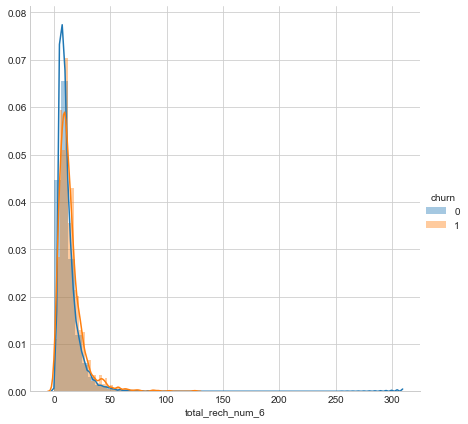

In [6]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_6").add_legend()

#its difficult to know about the churning rate based on total_rech_num_6 feature as overlaped data.

In [7]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_7"]))
print(np.mean(df_churn["total_rech_num_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_7"]))
print(np.median(df_churn["total_rech_num_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_7"],np.arange(0,100,25)))

Mean:
11.875464545859968
13.43170426065163
median:
9.0
10.0
Quantiles:
[  0.   6.   9.  15.]
[  0.   7.  10.  17.]


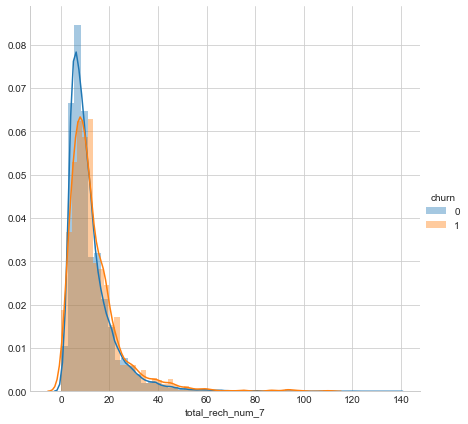

In [8]:
#feature importance of total_rech_data_7
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_7").add_legend()

#its difficult to know about the churning rate based on total_rech_data_7 feature as overlaped data.

In [9]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_8"]))
print(np.mean(df_churn["total_rech_num_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_8"]))
print(np.median(df_churn["total_rech_num_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_8"],np.arange(0,100,25)))

Mean:
10.523561766017542
7.021303258145363
median:
8.0
5.0
Quantiles:
[  0.   5.   8.  13.]
[ 0.  3.  5.  9.]


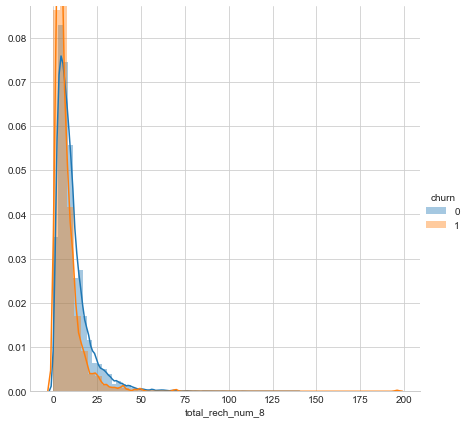

In [10]:
#feature importance of total_rech_amt_8
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_8").add_legend()

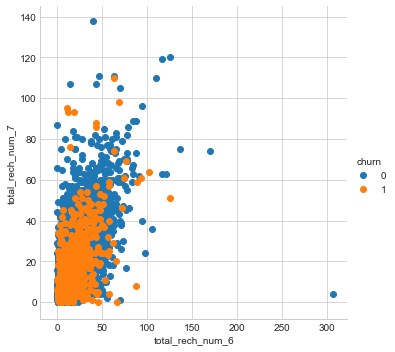

In [11]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_7").add_legend()

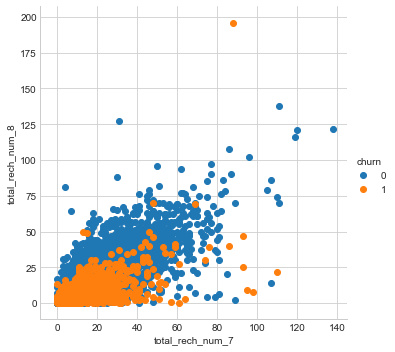

In [12]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_7","total_rech_num_8").add_legend()

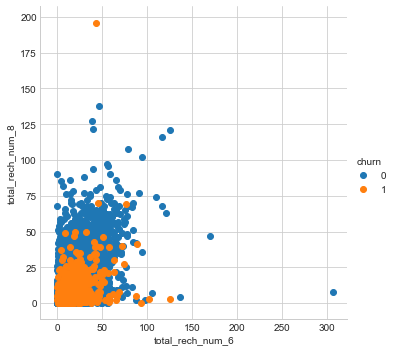

In [13]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_8").add_legend()

### Univariate Analysis on 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',

In [ ]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_6"]))
print(np.mean(df_churn["total_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_6"]))
print(np.median(df_churn["total_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_6"],np.arange(0,100,25)))

In [ ]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_6").add_legend()

In [ ]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_7"]))
print(np.mean(df_churn["total_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_7"]))
print(np.median(df_churn["total_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_7"],np.arange(0,100,25)))

In [ ]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_7").add_legend()

In [ ]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_8"]))
print(np.mean(df_churn["total_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_8"]))
print(np.median(df_churn["total_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_8"],np.arange(0,100,25)))

In [ ]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_8").add_legend()

In [ ]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend()

In [ ]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_8").add_legend()

In [ ]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()

### Univariate Analysis on max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',

In [ ]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_6"]))
print(np.mean(df_churn["max_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_6"]))
print(np.median(df_churn["max_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_6"],np.arange(0,100,25)))

In [ ]:
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_6").add_legend()

In [ ]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_7"]))
print(np.mean(df_churn["max_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_7"]))
print(np.median(df_churn["max_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_7"],np.arange(0,100,25)))

In [ ]:
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_7").add_legend()

In [ ]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_8"]))
print(np.mean(df_churn["max_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_8"]))
print(np.median(df_churn["max_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_8"],np.arange(0,100,25)))

In [ ]:
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_8").add_legend()

In [ ]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7").add_legend()

In [ ]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_7","max_rech_amt_8").add_legend()

In [ ]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_8").add_legend()

Note: due to space & size we did not include all univariate and bivariate analysis in this file.

### Correlation Matrix: Bivariate Analysis

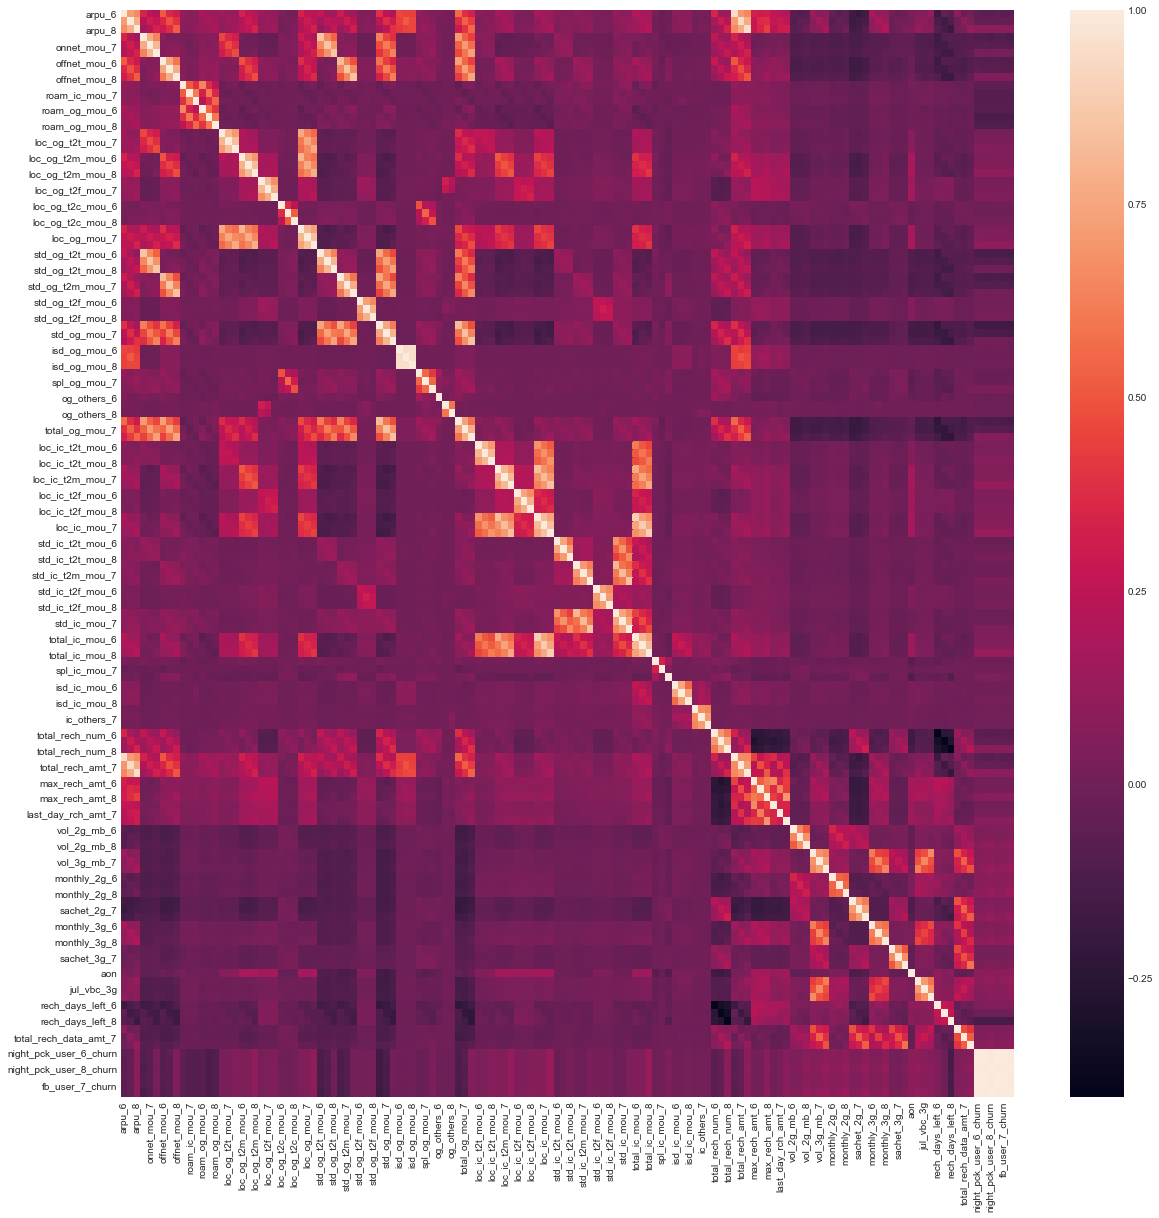

In [19]:
telecom2 = telecom.drop(['mobile_number', 'churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(telecom2.corr())

In [23]:
# Create correlation matrix
corr_matrix = telecom2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:38

['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'night_pck_user_7_churn', 'night_pck_user_8_churn', 'fb_user_6_churn', 'fb_user_7_churn', 'fb_user_8_churn']


* OBSERVATION: 38 highly correlated features (> 80%) found in the data set.
* NOTE: We are not dropping these columns manually rather using feature reduction methods to do the job. We worked with RFE, LASSO and PCA.

# <font color='blue'>SUMMARY PART 2: EXPLORATORY DATA ANALYSIS (EDA)</font>

OBSERVATIONS
1. Data is higly imbalanced only 5.6% data is churn & remaining is non_churn
2. From univariate analysis some relationship is emerging to the churn, but no clear relationship found.
3. There are many highly correlated features, found 38 features with more then 0.8 correlation.

NEXT STEPS:
1. Need to balance the data, apply suitable data-balancing method
2. Features are highly correlated, use feture reduction methods before modelling.

In [36]:
# <font color='blue'>SUMMARY PART 2: EXPLORATORY DATA ANALYSIS (EDA)</font>
1.
2.
3.

3.0

## Create X, y variables

In [ ]:
X = telecom.drop(['churn'],axis=1)
y = telecom['churn']

## Applying standard scale

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

X = scaler.transform(X)

## Applying Lasso

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.02, penalty="l1", dual=False).fit(X,y)
model = SelectFromModel(lsvc, prefit=True)
X_l = model.transform(X)
pos = model.get_support(indices=True)
 
print(X_l.shape)
print(pos)

## Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_l,y, train_size=0.7,random_state=42)

# Applying smote

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)

# Applying decision tree

In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_tr, y_tr)

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred_default))

In [ ]:
print("DecisionTreeClassifier accuracy with Lasso: ", accuracy_score(y_test,y_pred_default))

# Applying PCA

In [ ]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

In [ ]:
df_train_pca = pca.fit_transform(X_tr)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

# Apply logistic regression

In [ ]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(df_train_pca, y_tr)

# Predicted probabilities
y_pred = logsk.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

In [ ]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))